## Fiddling with RELU and linearity

In [1]:
import numpy as np

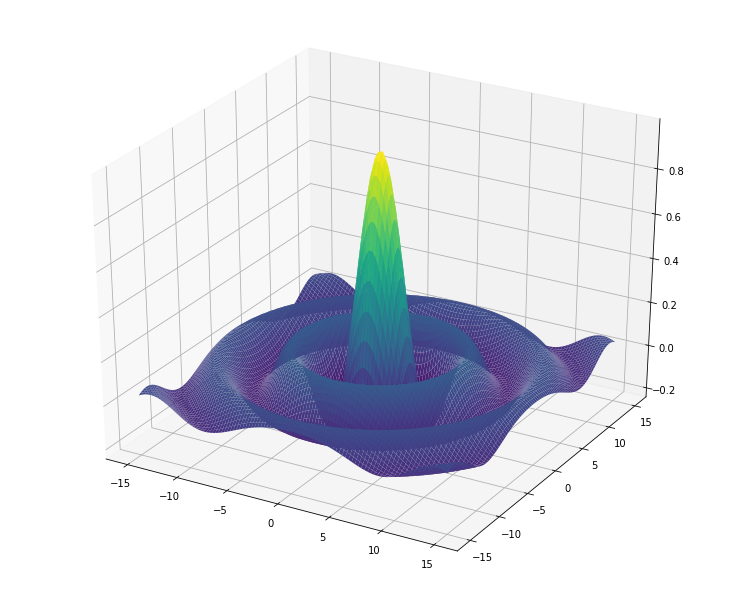

In [145]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin((x**2+y**2)**0.5) / np.sqrt(x**2+y**2)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y),
                    cmap='viridis', rcount=100, ccount=100)
    
    plt.show()

gridx, gridy = np.meshgrid(np.linspace(-15, 15, 100), np.linspace(-15, 15, 100))

draw_f(gridx, gridy)

Создадим модель и заставим её выучить "данные":

In [3]:
from torch.autograd import Variable
from torch import LongTensor, FloatTensor, Tensor
import torch.nn as nn
import torch.nn.functional as F

In [99]:
class FittingNet(nn.Module):
    def __init__(self):
        super(FittingNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(2, 16),
            nn.Tanh(),
            nn.Linear(16, 8),
            nn.Tanh(),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        x = self.fc(x)
        return x

In [126]:
net = FittingNet()

In [127]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters())

In [128]:
gx, gy = np.meshgrid(np.linspace(-30, 30, 50), np.linspace(-30, 30, 50))
z = f(gx, gy)
inputs_ = []
labels_ = []
for i in range(50):
    for j in range(50):
        inputs_.append((gx[0][i], gy[j][0]))
        labels_.append(z[i][j])

inputs_ = np.array(inputs_)
labels_ = np.array([[i] for i in labels_])
inputs_.shape, labels_.shape

((2500, 2), (2500, 1))

In [129]:
for epoch in range(200):  # loop over the dataset multiple times
    running_loss = 0.0
    for i in range(200):
        inputs = FloatTensor(inputs_)
        labels = FloatTensor(labels_)
        #print(labels.shape)
        # wrap them in Variable
        inputs = Variable(inputs, requires_grad=False)
        labels = Variable(labels, requires_grad=False)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        loss = criterion(outputs.squeeze(1), labels)
        loss.backward()
        optimizer.step()

print('Finished Training')

Finished Training


In [119]:
def f_pred(x, y):
    return float(net.forward(Variable(FloatTensor([[x, y]]))).view(-1)[0])

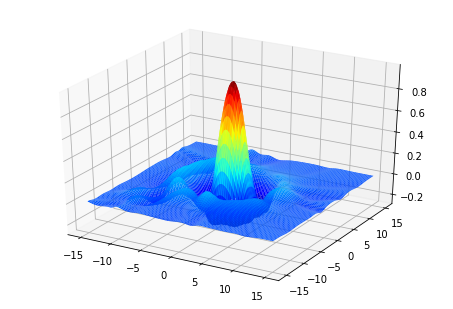

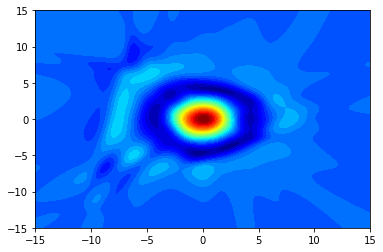

In [131]:
def draw_f():
    fig = plt.figure(1)
    ax = Axes3D(fig)
    x, y = np.meshgrid(np.linspace(-15, 15, 100), np.linspace(-15, 15, 100))
    zs = np.array([f_pred(x,y) for x,y in zip(np.ravel(x), np.ravel(y))])
    Z = zs.reshape(x.shape)
    #ax.azim = 200
    ax.plot_surface(
        x, y, Z, cmap='jet', rstride=1, cstride=1,
        linewidth=1, antialiased=True
    )
    fig2 = plt.figure(2)
    plt.contourf(x, y, Z, 40, cmap='jet')
    plt.show()

draw_f()

## Выводы
 - ReLU и HardTanH самые быстрые и самые "жёсткие"
 - tanh даёт лучший результат
 - Интересные ландшафты вне области, по которой училась сеть
 - красивая визуализация